<a href="https://colab.research.google.com/github/ananya0386/OvarianCancer_PBL/blob/main/OC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_excel("/content/drive/MyDrive/PBL/Biomarker/Supplementary data 3.xlsx")
test_data = pd.read_excel("/content/drive/MyDrive/PBL/Biomarker/Supplementary data 5.xlsx")

In [ ]:
train_data.columns

Index(['TYPE', 'MPV', 'BASO#', 'PHOS', 'GLU.', 'K', 'AST', 'BASO%', 'Mg',
       'Menopause', 'CL', 'CEA', 'EO#', 'CA19-9', 'ALB', 'IBIL', 'GGT', 'MCH',
       'GLO', 'ALT', 'DBIL', 'Age', 'RDW', 'PDW', 'CREA', 'AFP', 'HGB', 'Na',
       'HE4', 'LYM#', 'CA125', 'BUN', 'LYM%', 'Ca', 'AG', 'MONO#', 'PLT',
       'NEU', 'EO%', 'TP', 'UA', 'RBC', 'PCT', 'CO2CP', 'TBIL', 'HCT', 'MONO%',
       'MCV', 'ALP'],
      dtype='object')

In [ ]:
test_data.columns

Index(['SUBJECT_ID', 'AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#',
       'BASO%', 'BUN', 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP',
       'CREA', 'TYPE', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT',
       'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause',
       'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT',
       'RBC', 'RDW', 'TBIL', 'TP', 'UA'],
      dtype='object')

In [ ]:
train_data["TYPE"].unique()

array([0, 1])

/tmp/ipython-input-1586988730.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  train_data = train_data.apply(pd.to_numeric, errors='ignore')
/tmp/ipython-input-1586988730.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  test_data = test_data.apply(pd.to_numeric, errors='ignore')


Accuracy: 0.5526315789473685

Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        25
           1       1.00      0.43      0.60        89

    accuracy                           0.55       114
   macro avg       0.66      0.71      0.55       114
weighted avg       0.85      0.55      0.58       114


Confusion Matrix:
[[25  0]
 [51 38]]

Top 10 Important Biomarkers:
   Feature  Importance
27     HE4    0.159119
29   CA125    0.081156
31    LYM%    0.053977
20     Age    0.050391
28    LYM#    0.039909
10     CEA    0.034487
36     NEU    0.032886
22     PDW    0.025949
5      AST    0.025920
7       Mg    0.025546


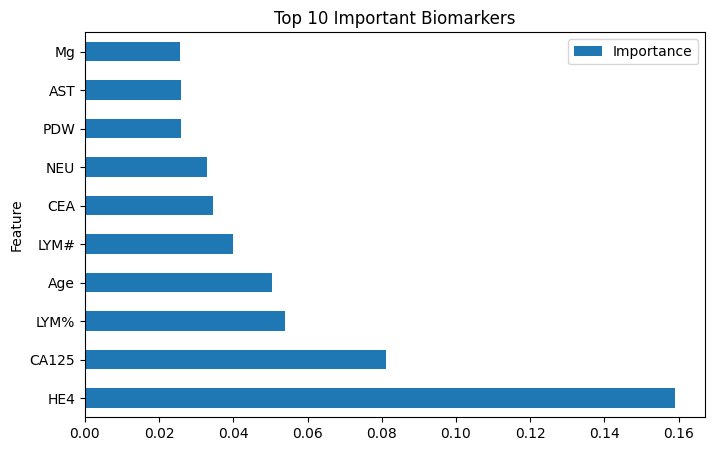


Model saved as ovarian_model.pkl


In [ ]:
# ==============================
# 2. CLEAN DATA (remove > and <)
# ==============================
for col in train_data.columns:
    train_data[col] = train_data[col].astype(str).str.replace('>', '', regex=False)
    train_data[col] = train_data[col].astype(str).str.replace('<', '', regex=False)

for col in test_data.columns:
    test_data[col] = test_data[col].astype(str).str.replace('>', '', regex=False)
    test_data[col] = test_data[col].astype(str).str.replace('<', '', regex=False)

# Convert to numeric where possible
train_data = train_data.apply(pd.to_numeric, errors='ignore')
test_data = test_data.apply(pd.to_numeric, errors='ignore')

# ==============================
# 3. Prepare Training Data
# ==============================
X_train = train_data.drop(["TYPE"], axis=1)
y_train = train_data["TYPE"]

# ==============================
# 4. Prepare Testing Data
# Keep only same columns as training
# ==============================
X_test = test_data[X_train.columns]
y_test = test_data["TYPE"]

# ==============================
# 5. Train Model
# ==============================
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

# ==============================
# 6. Predict
# ==============================
pred = model.predict(X_test)

# ==============================
# 7. Evaluation
# ==============================
print("Accuracy:", accuracy_score(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))

# ==============================
# 8. Feature Importance
# ==============================
importance = model.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
plt.show()
# ==============================
# 9. Graph
# ==============================
print("\nTop 10 Important Biomarkers:")
print(feat_imp.head(10))

feat_imp.head(10).plot(
    x='Feature',
    y='Importance',
    kind='barh',
    figsize=(8,5)
)

plt.title("Top 10 Important Biomarkers")
plt.show()
# ==============================
# 10. Save Model
# ==============================
joblib.dump(model, "ovarian_model.pkl")
print("\nModel saved as ovarian_model.pkl")
